In [187]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Load Dataset

In [188]:
# Load Dataset
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (3).csv


In [189]:
import pandas as pd
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [190]:
# Describe the dataset
import pandas as pd
data = pd.read_csv('diabetes.csv')
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [191]:
# Step 1: Data Overview
print("Dataset Overview:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())
print("\nDataset Columns:")
print(data.columns)
print("\nTotal number of null values in the dataset:")
print(data.isnull().sum())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Descriptive Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.1

In [192]:
# List of columns to check
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Showing the count of NaNs
print("Showing the count of NaNs:")
print(data.isnull().sum())

Showing the count of NaNs:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Data Distribution before Imputing Missing Values


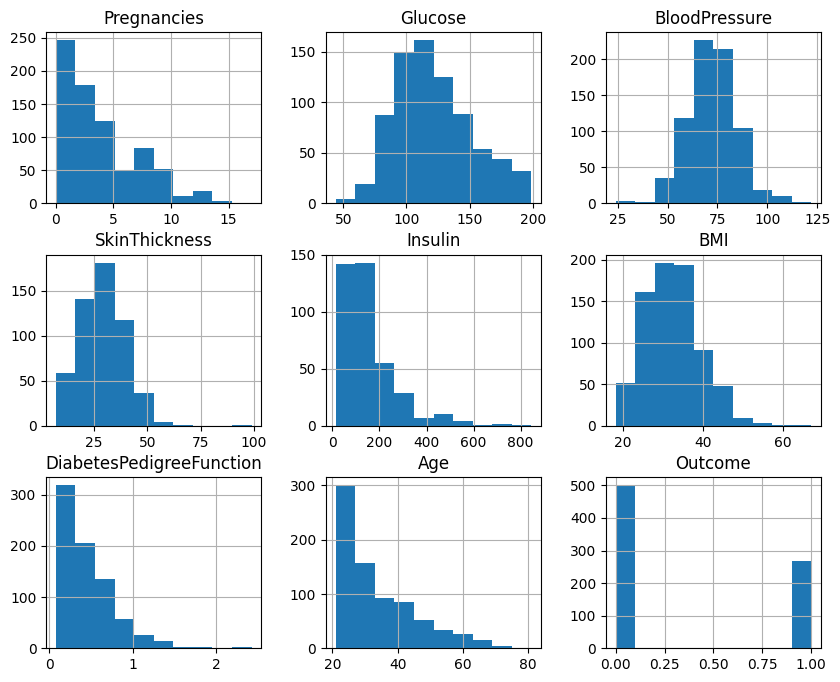

In [193]:
#Data Distribution Before Imputing Missing Values

print("Data Distribution before Imputing Missing Values")
p = data.hist(figsize=(10, 8))

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Data Distribution After Imputing Missing Values


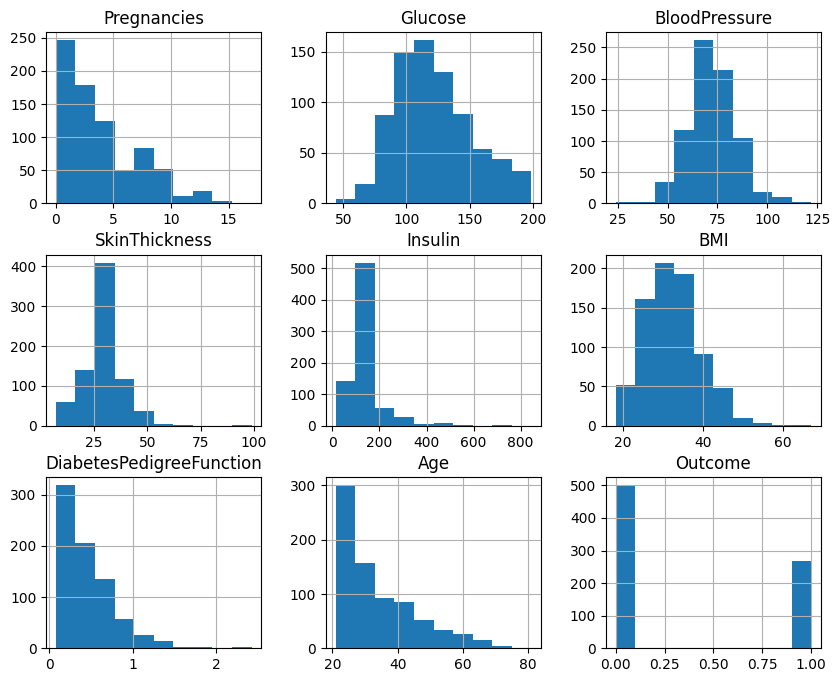

In [194]:
# Step 2: Data Preprocessing
# Replace 0s with NaN for the columns where 0 is not a valid value
columns_with_invalid_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_invalid_zero] = data[columns_with_invalid_zero].replace(0, np.nan)

# Replace NaN values with the mean of the respective column
data.fillna(data.mean(), inplace=True)

# Check the dataset after replacement
print(data.head())

print("Data Distribution After Imputing Missing Values")
p = data.hist(figsize=(10, 8))

In [195]:
# List of columns to check
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Showing the count of NaNs
print("Showing the count of NaNs:")
print(data.isnull().sum())

Showing the count of NaNs:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


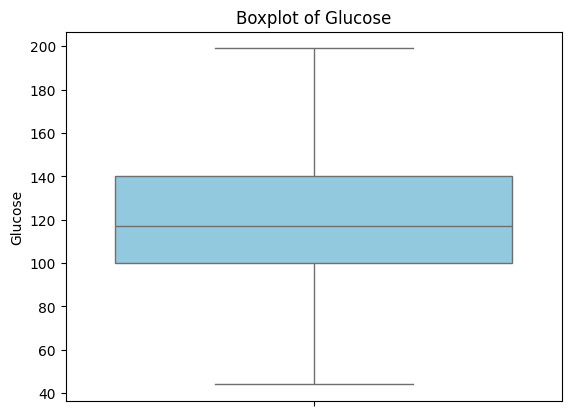

In [196]:
# Boxplot for visualizing outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data['Glucose'], color='skyblue')
plt.title("Boxplot of Glucose")
plt.show()

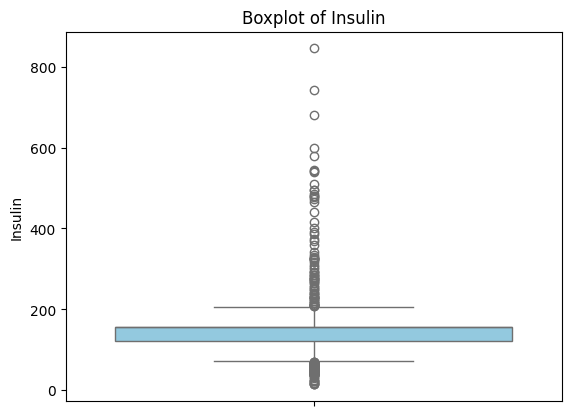

In [197]:
# Boxplot for visualizing outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data['Insulin'], color='skyblue')
plt.title("Boxplot of Insulin")
plt.show()

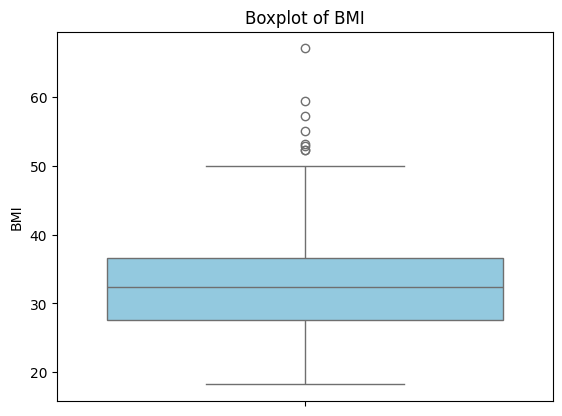

In [198]:
# Boxplot for visualizing outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data['BMI'], color='skyblue')
plt.title("Boxplot of BMI")
plt.show()

In [199]:
# Step 3: Correlation Analysis
import pandas as pd
data = pd.read_csv('diabetes.csv')
print(data)
print("\nCorrelation Matrix:")
corr_matrix = data.corr()
print(corr_matrix['Outcome'].sort_values(ascending=False))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

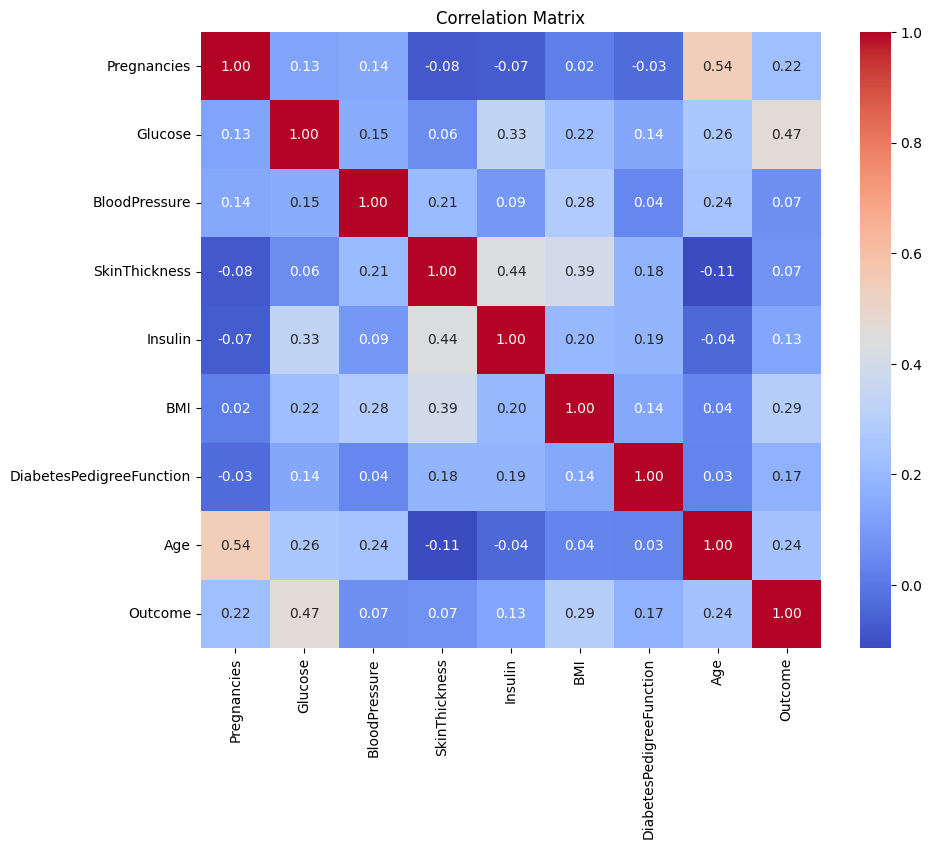

In [200]:
# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [201]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data.drop(columns='Outcome')
X_scaled = scaler.fit_transform(X)
y = data['Outcome']

In [202]:
# Step 4: Train-Test Split
# Split the dataset into training and testing sets (70% train, 30% test)
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']                # Target
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [203]:
# Step 5: Logistic Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [204]:
# Step 5: Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
log_predictions = log_model.predict(X_test)

In [205]:
# Coefficients for risk analysis
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print("\nLogistic Regression Coefficients:")
print(coefficients)


Logistic Regression Coefficients:
                    Feature  Coefficient
1                   Glucose     1.121351
5                       BMI     0.838097
7                       Age     0.416291
0               Pregnancies     0.194207
6  DiabetesPedigreeFunction     0.139197
3             SkinThickness    -0.024622
4                   Insulin    -0.104902
2             BloodPressure    -0.198749


Logistic Regression Accuracy:  0.7359307359307359
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



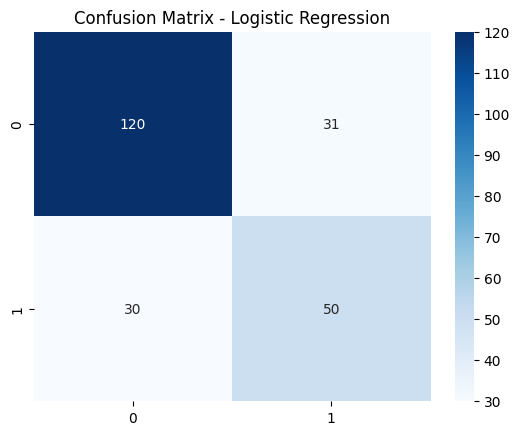

In [206]:
#Evaluate the model: Logistic regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_lr = model_lr.predict(X_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [207]:
# Step 6: Random Forest

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [208]:
# Step 6: Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [209]:
# Feature Importance for risk analysis
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importance:")
print(rf_importance)


Random Forest Feature Importance:
                    Feature  Importance
1                   Glucose    0.282089
5                       BMI    0.158120
7                       Age    0.142116
6  DiabetesPedigreeFunction    0.113127
2             BloodPressure    0.084052
0               Pregnancies    0.080552
3             SkinThickness    0.070559
4                   Insulin    0.069385


Random Forest Accuracy:  0.7575757575757576
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       151
           1       0.65      0.66      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.76      0.76       231



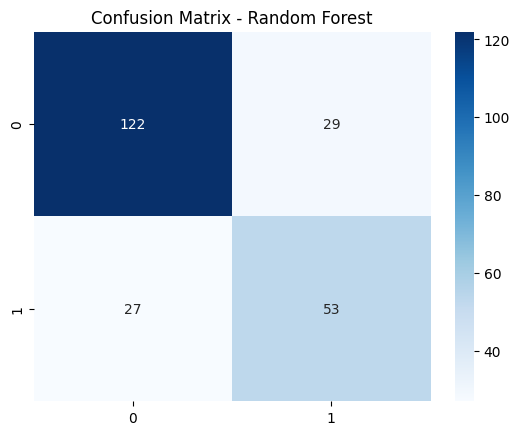

In [210]:
#Evaluate the model Random forest
y_pred_rf = model_rf.predict(X_test)
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

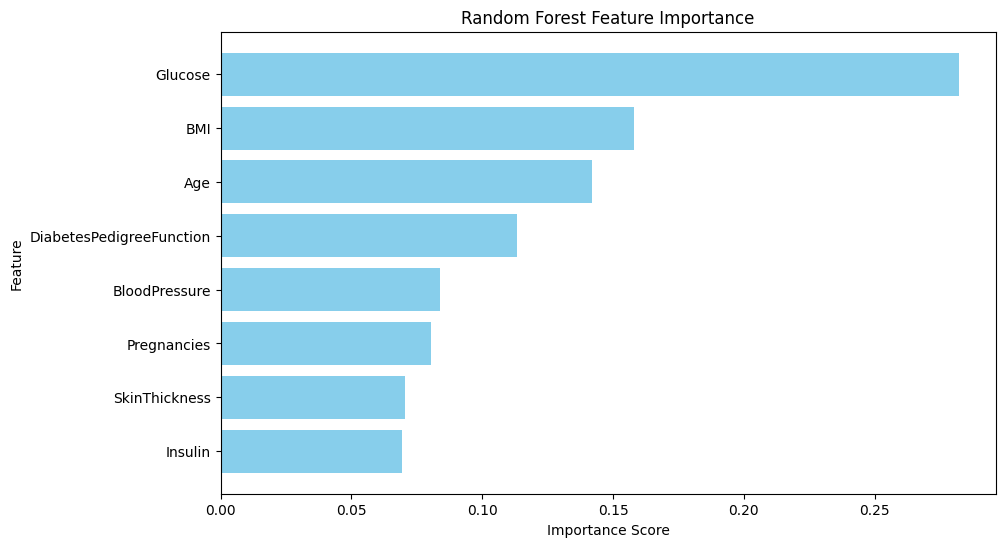

In [211]:
# Feature importance visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(rf_importance['Feature'], rf_importance['Importance'], color='skyblue')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

In [225]:
# Step 7. Neural Network Model (using Keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))  # Input layer
nn_model.add(Dense(8, activation='relu'))  # Hidden layer
nn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network model
nn_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Predict using the neural network
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int64")




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━

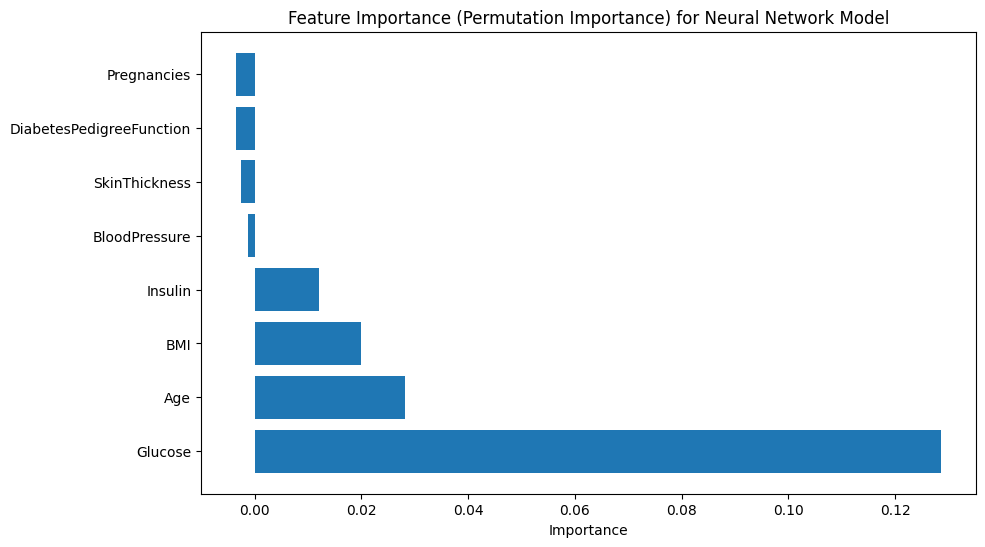

                    Feature  Importance
1                   Glucose    0.128571
7                       Age    0.028139
5                       BMI    0.019913
4                   Insulin    0.012121
2             BloodPressure   -0.001299
3             SkinThickness   -0.002597
6  DiabetesPedigreeFunction   -0.003463
0               Pregnancies   -0.003463


In [228]:
# Feature importance for neural network
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Define neural network model
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))  # Input layer
nn_model.add(Dense(8, activation='relu'))  # Hidden layer
nn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Define a scoring function for the neural network to be compatible with permutation importance
def score_function(model, X, y):
    y_pred = (model.predict(X) > 0.5).astype("int64")
    return accuracy_score(y, y_pred)

# Perform permutation importance
result = permutation_importance(nn_model, X_test, y_test, n_repeats=10, random_state=42, scoring=score_function)

# Get the mean importance of each feature
importance = result.importances_mean
feature_names = X.columns  # Assuming X is a DataFrame with feature names

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Permutation Importance) for Neural Network Model')
plt.show()

# Display the feature importance
print(importance_df)


In [229]:
# Evaluate the Neural Network
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

# Print Neural Network evaluation
print("\nNeural Network Evaluation:")
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1-Score: {f1_nn:.4f}")


Neural Network Evaluation:
Accuracy: 0.7056
Precision: 0.5714
Recall: 0.6000
F1-Score: 0.5854


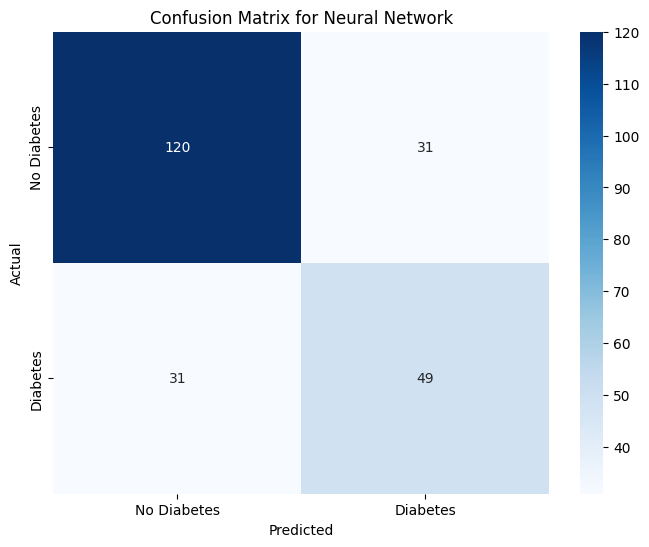

In [232]:
# Confusion Matrix for Neural Network
conf_matrix = confusion_matrix(y_test, y_pred_nn)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network')
plt.show()

**ROC Curve**

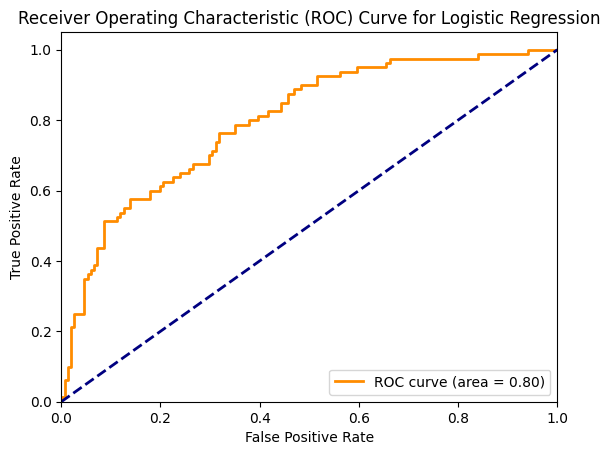

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already split the data into training and testing sets (X_train, X_test, y_train, y_test)
# Train the Logistic Regression model
model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class = 1)
fpr, tpr, thresholds = roc_curve(y_test, model_lr.predict_proba(X_test)[:, 1])

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Line for random classifier (AUC = 0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

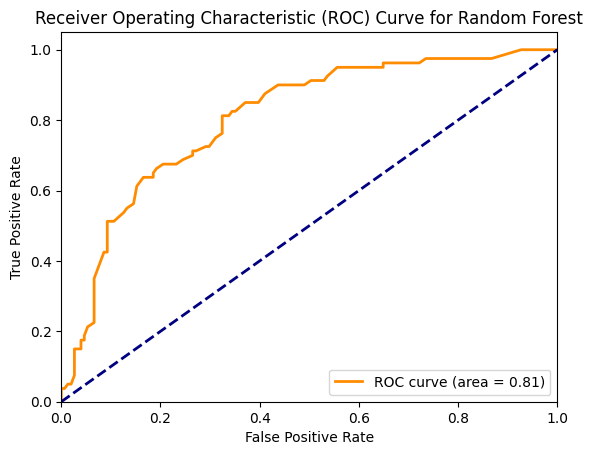

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already split the data into training and testing sets (X_train, X_test, y_train, y_test)
# Train the Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class = 1)
fpr, tpr, thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1])

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Line for random classifier (AUC = 0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


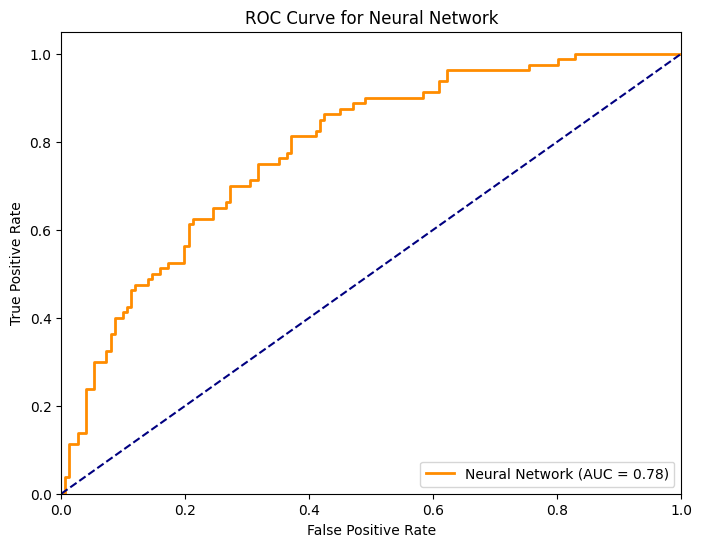

In [230]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns


# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Neural Network Model (using Keras)
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))  # Input layer
nn_model.add(Dense(8, activation='relu'))  # Hidden layer
nn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network model
nn_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Predict using the neural network
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int64")



# ROC Curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_model.predict(X_test))
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network')
plt.legend(loc='lower right')
plt.show()


Comparison among Models


In [233]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Logistic Regression Model Predictions
y_pred_lr = model_lr.predict(X_test)

# Random Forest Model Predictions
y_pred_rf = model_rf.predict(X_test)

# Predict using the neural network
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")

# Precision, Recall, F1-score for Logistic Regression
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Precision, Recall, F1-score for Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Evaluate the Neural Network
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)


# Display the comparison in a readable format
comparison_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-score'],
    'Logistic Regression': [precision_lr, recall_lr, f1_lr],
    'Random Forest': [precision_rf, recall_rf, f1_rf],
    'Neural Network': [precision_nn, recall_nn, f1_nn]
})

print(comparison_df)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
      Metric  Logistic Regression  Random Forest  Neural Network
0  Precision             0.617284       0.638554          0.6125
1     Recall             0.625000       0.662500          0.6125
2   F1-score             0.621118       0.650307          0.6125
